<a href="https://colab.research.google.com/github/wantepim84/NetworkX/blob/main/NetworkX_Ch9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
import random

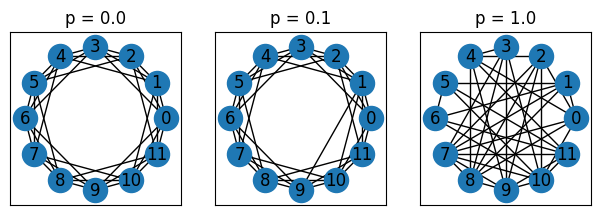

In [3]:
# Watts-Strogatz and Small Worlds
# generate Watts-Strogatz small-world networks with p = 0, p = 0.1, and p = 1
plt.figure(figsize=(7.5, 2.25))
for i, p in enumerate([0.0, 0.1, 1.0]):
    # Generate the graph
    G = nx.watts_strogatz_graph(12, 6, p)
    # Create layout and draw
    plt.subplot(1, 3, i + 1)
    pos = nx.circular_layout(G)
    nx.draw_networkx(G, pos=pos)
    plt.title("p = {:0.1f}".format(p))

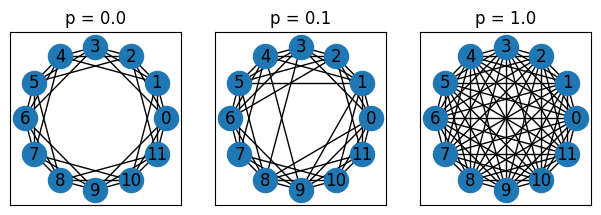

In [4]:
# Genrate newman watts stogartz netwrok- use 'newman_watts_strogatz_graph()' function
plt.figure(figsize=(7.5, 2.25))
for i, p in enumerate([0.0, 0.1, 1.0]):
    # Generate the graph
    G = nx.newman_watts_strogatz_graph(12, 6, p)
    # Create layout and draw
    plt.subplot(1, 3, i + 1)
    pos = nx.circular_layout(G)
    nx.draw_networkx(G, pos=pos)
    plt.title("p = {:0.1f}".format(p))

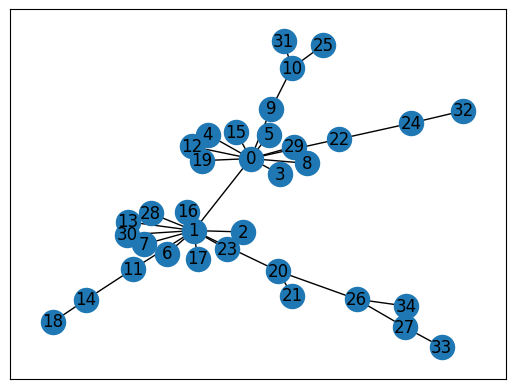

In [5]:
# Preferential attachment and heavy-tailed networks
G_preferential_35 = nx.barabasi_albert_graph(35, 1)
pos = nx.spring_layout(G_preferential_35, k=0.1)
nx.draw_networkx(G_preferential_35, pos)

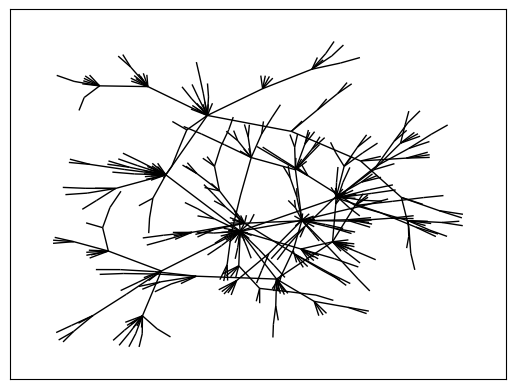

In [6]:
# Larger network (500 nodes)
G_preferential_500 = nx.barabasi_albert_graph(500, 1)
pos = nx.spring_layout(G_preferential_500)
nx.draw_networkx(G_preferential_500, pos, node_size=0, with_labels=False)

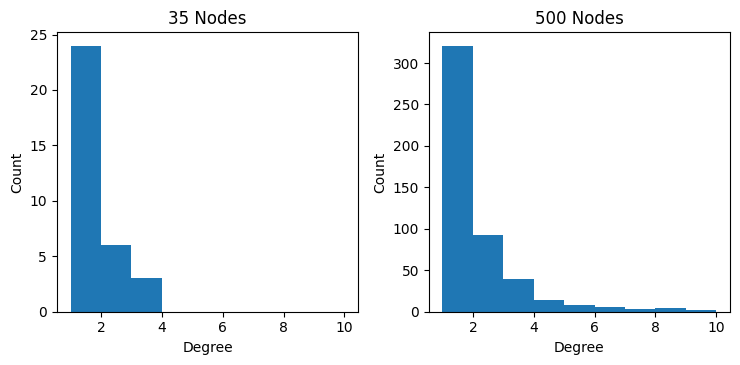

In [7]:
# Visualize the degree distributions for the 35-node and 500-node preferential attachment networks
def plot_degree_hist(G, title):
    """Plot histogram of node degrees."""
    plt.hist(dict(nx.degree(G)).values(), bins=range(1, 11))
    # Label axes
    plt.xlabel('Degree')
    plt.ylabel('Count')
    plt.title(title)

plt.figure(figsize=(7.5, 3.75))
ax = plt.subplot(1,2,1)
plot_degree_hist(G_preferential_35, '35 Nodes')
for spine in ax.spines.values():
    spine.set_visible(True)
ax = plt.subplot(1,2,2)
for spine in ax.spines.values():
    spine.set_visible(True)
plot_degree_hist(G_preferential_500, '500 Nodes')
plt.tight_layout()

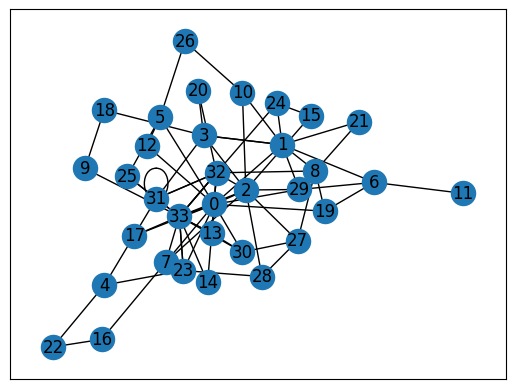

In [8]:
# Configuration models- using 'configuartion model' function
# Find degrees of karate club nodes
G_karate = nx.karate_club_graph()
degree_sequence = dict(nx.degree(G_karate)).values()
# Generate a random network with the same node degrees
G_configuration = nx.degree_seq.configuration_model(degree_sequence)
nx.draw_networkx(G_configuration)

In [11]:
# Agent-Based Models
# Create agent-based models
def initial_beliefs(G, true_value=0, std=15):
    """Generate estimates of a true value with normally-distributed errors."""
    beliefs = dict(
        (v, random.gauss(true_value, std))
        for v in G.nodes())
    return beliefs
# generate observations for the agents
beliefs = initial_beliefs(G_karate, true_value=42)

In [12]:
# simulates one round of nodes interacting with each other and imporving value(in this particular example that is social learnig. Nodes represent people)
def learning_step(G, beliefs):
    '''Update each node's beliefs based on its neighbors' beliefs'''
    new_beliefs = dict()
    for v in G.nodes():
        # Include old belief in average
        total = beliefs[v]
        count = 1
        # Update average based on each neighbor
        for w in G.neighbors(v):
            total += beliefs[w]
            count += 1
        # Calculate average for node w
        new_beliefs[v] = total / count
    return new_beliefs

In [13]:
# Simulates several rounds of agent(node) learning on a given network, and plots the evolution of agent states
def plot_beliefs(G, initial_beliefs, true_value=0, steps=10):
    """Plot change in beliefs over time."""
    current_beliefs = dict(initial_beliefs)
    beliefs = [current_beliefs]
    # Create dicts of x and y values for each node
    x = dict((v, list()) for v in G.nodes())
    y = dict((v, list()) for v in G.nodes())
    # Repeatedly update beliefs
    for i in range(steps + 1):
        for v in G.nodes():
            x[v].append(i)
            y[v].append(current_beliefs[v])
        if i < steps:
            current_beliefs = learning_step(G, current_beliefs)
            beliefs.append(current_beliefs)
    # Plot evolution of each node's beliefs
    for v in G.nodes():
        plt.plot(x[v], y[v], 'b-', alpha=0.3, linewidth=2)
    # Plot mean value
    mean_value = sum(initial_beliefs.values()) / len(initial_beliefs)
    plt.plot([0, steps], [mean_value, mean_value], 'k:')
    # Add spines to plot
    ax = plt.gca()
    for spine in ax.spines.values():
        spine.set_visible(True)
    plt.xlim([0, steps])
    plt.ylim([22, 62])

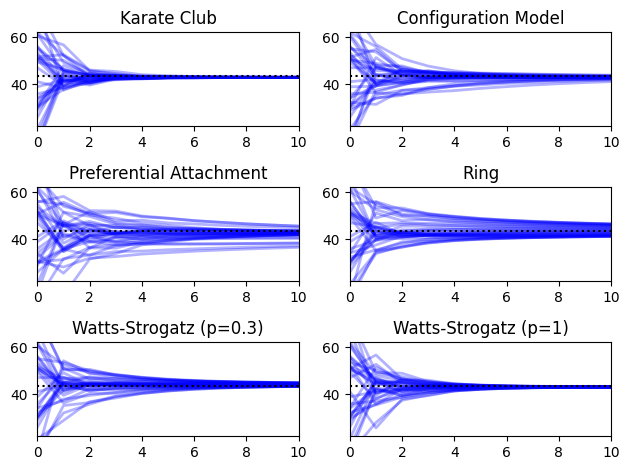

In [14]:
# Generation agent-based simulation of node learning on several different networks, all starting from the same initial beliefs
networks = {
    'Karate Club': G_karate,
    'Configuration Model': G_configuration,
    'Preferential Attachment': nx.barabasi_albert_graph(34, 1),
    'Ring': nx.watts_strogatz_graph(34, 6, 0),
    'Watts-Strogatz (p=0.3)': nx.watts_strogatz_graph(34, 6, 0.1),
    'Watts-Strogatz (p=1)': nx.watts_strogatz_graph(34, 6, 1)}
# Simulate and plot results for each network
for i, (title, G) in enumerate(networks.items()):
    plt.subplot(3, 2, i + 1)
    plt.title(title)
    plot_beliefs(G, beliefs, 42)
plt.tight_layout()